In [503]:
import pandas as pd


In [504]:
df = pd.read_csv('Ship_Performance_Dataset.csv')

In [505]:
df.dtypes

Date                        object
Ship_Type                   object
Route_Type                  object
Engine_Type                 object
Maintenance_Status          object
Speed_Over_Ground_knots    float64
Engine_Power_kW            float64
Distance_Traveled_nm       float64
Draft_meters               float64
Weather_Condition           object
Cargo_Weight_tons          float64
Operational_Cost_USD       float64
Revenue_per_Voyage_USD     float64
Turnaround_Time_hours      float64
Efficiency_nm_per_kWh      float64
Seasonal_Impact_Score      float64
Weekly_Voyage_Count          int64
Average_Load_Percentage    float64
dtype: object

In [506]:
df.drop(['Date'],axis=1,inplace=True)
df.drop(['Weather_Condition'],axis=1,inplace=True)

In [507]:
columns = df.columns
for column in columns:
    print(f"Column:{column}:\n{df[column].value_counts()}")
    print(f"Nulls: {df[column].isnull().sum()}\n")

Column:Ship_Type:
Bulk Carrier      669
Fish Carrier      653
Tanker            643
Container Ship    635
None              136
Name: Ship_Type, dtype: int64
Nulls: 0

Column:Route_Type:
Long-haul       686
Coastal         650
Transoceanic    638
Short-haul      626
None            136
Name: Route_Type, dtype: int64
Nulls: 0

Column:Engine_Type:
Diesel                  892
Steam Turbine           855
Heavy Fuel Oil (HFO)    853
None                    136
Name: Engine_Type, dtype: int64
Nulls: 0

Column:Maintenance_Status:
Good        873
Fair        867
Critical    860
None        136
Name: Maintenance_Status, dtype: int64
Nulls: 0

Column:Speed_Over_Ground_knots:
16.712295    1
12.576364    1
13.913931    1
20.998733    1
17.318183    1
            ..
22.304306    1
12.041621    1
23.519496    1
24.720186    1
16.846867    1
Name: Speed_Over_Ground_knots, Length: 2736, dtype: int64
Nulls: 0

Column:Engine_Power_kW:
1272.445230    1
2490.386237    1
2989.680869    1
2998.685375    1
8

In [508]:
df.columns

Index(['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status',
       'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Cargo_Weight_tons', 'Operational_Cost_USD',
       'Revenue_per_Voyage_USD', 'Turnaround_Time_hours',
       'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage'],
      dtype='object')

In [509]:
df = df[df['Ship_Type'] != 'None']

In [510]:
df = df[df['Route_Type'] != 'None']

In [511]:
df = df[df['Maintenance_Status'] != 'None']

In [512]:
importance = {
    'Tanker': 3,
    'Container Ship': 2,
    'Bulk Carrier': 1,
    'Fish Carrier': 0
}
df['Ship_Type'] = df['Ship_Type'].map(importance)

In [513]:
importance_of_Route = {
    'Transoceanic':3,
    'Long-haul':2,
    'Coastal':1,
    'Short-haul': 0
}
df['Route_Type'] = df['Route_Type'].map(importance_of_Route)

In [514]:
importance_of_Maintenance = {
    'Fair' : 2,
    'Good' : 1,
    'Critical': 0
}
df['Maintenance_Status'] = df['Maintenance_Status'].map(importance_of_Maintenance)

In [517]:
df.columns

Index(['Ship_Type', 'Route_Type', 'Engine_Type', 'Maintenance_Status',
       'Speed_Over_Ground_knots', 'Engine_Power_kW', 'Distance_Traveled_nm',
       'Draft_meters', 'Cargo_Weight_tons', 'Operational_Cost_USD',
       'Revenue_per_Voyage_USD', 'Turnaround_Time_hours',
       'Efficiency_nm_per_kWh', 'Seasonal_Impact_Score', 'Weekly_Voyage_Count',
       'Average_Load_Percentage'],
      dtype='object')

In [532]:
X = df[['Engine_Power_kW',
       'Distance_Traveled_nm',
        ]].values

In [533]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

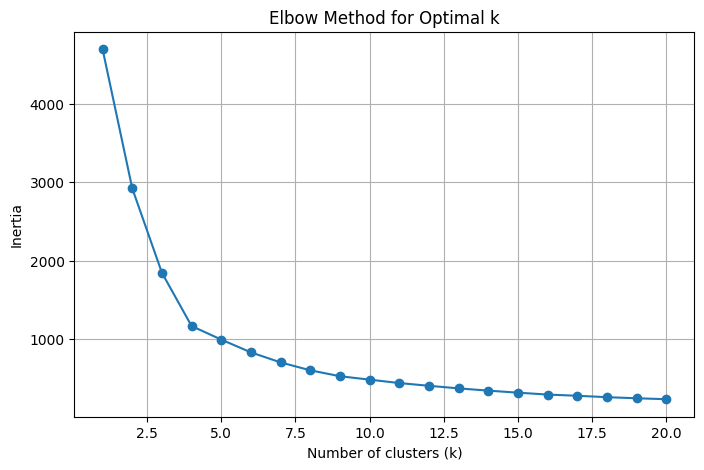

In [534]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
inertia = []
k_range = range(1,21)
for i in k_range:
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

In [535]:
kmeans = KMeans(n_clusters=8,random_state=42)
kmeans.fit(X)

KMeans(random_state=42)

In [536]:
df['Cluster'] = kmeans.labels_

In [537]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

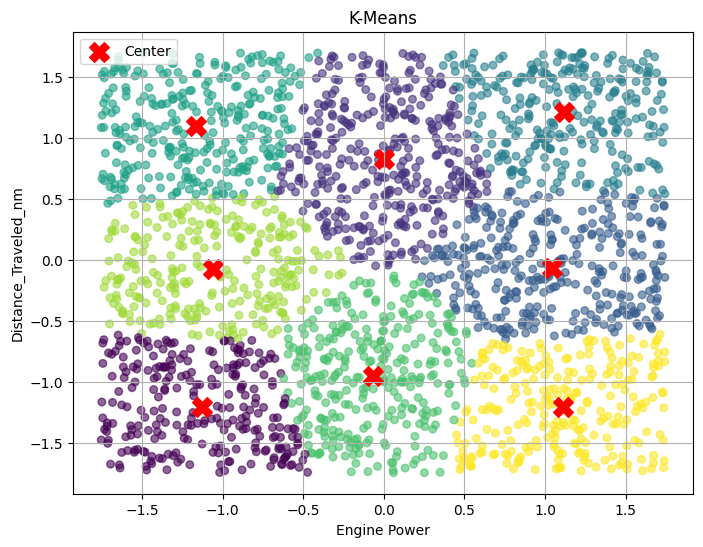

In [544]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=30, alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Center')
plt.title("K-Means")
plt.xlabel("Engine Power")
plt.ylabel("Distance_Traveled_nm")
plt.legend()
plt.grid(True)
plt.show()

In [545]:
print(kmeans.inertia_)

599.4731410185632


In [546]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print(silhouette_avg)

0.36327070996398214
